['Setosa' 'Versicolor' 'Virginica']
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000

A legnagyobb korreláció két különböző oszlop között:
('petal_length', 'petal_width')


C:\Users\Bence\AppData\Local\Temp\ipykernel_27016\409785419.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.', '_')
C:\Users\Bence\AppData\Local\Temp\ipykernel_27016\409785419.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


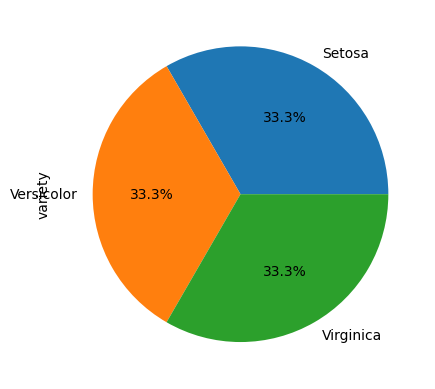

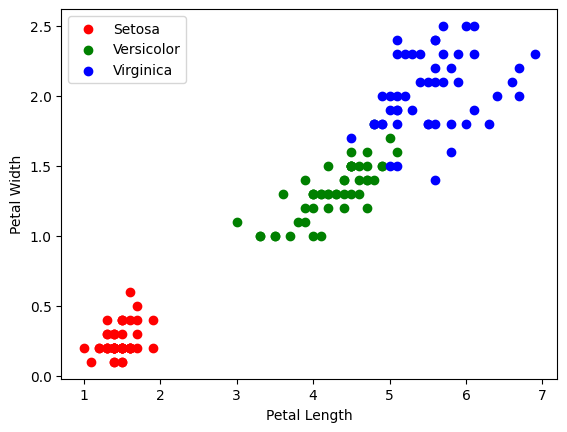

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1.1
df = pd.read_csv('iris.csv')

# 1.2
df.columns = df.columns.str.replace('.', '_')

# 1.3
df = df.dropna()

# 1.4
print(df['variety'].unique())

# 1.5
correlations = df.corr()
print(correlations)
print('\nA legnagyobb korreláció két különböző oszlop között:')
print(correlations.unstack().sort_values(ascending=False)[len(correlations):-1:2].idxmax())

# 1.6
df['variety'] = df['variety'].map({'Setosa': 0, 'Versicolor': 1, 'Virginica': 2})

# 1.7
df = df.drop(columns=['sepal_width'])

# 1.8
df['variety'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Setosa', 'Versicolor', 'Virginica'])
plt.show()

# 1.9
colors = ['red', 'green', 'blue']
species = ['Setosa', 'Versicolor', 'Virginica']
for i, species in enumerate(species):
    specific_df = df[df['variety'] == i]
    plt.scatter(specific_df['petal_length'], specific_df['petal_width'], color=colors[i], label=species)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()


In [3]:
from sklearn.model_selection import train_test_split

# 2.1
X = df.drop(columns=['variety'])
y = df['variety']

# 2.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


A modell pontossága: 1.0


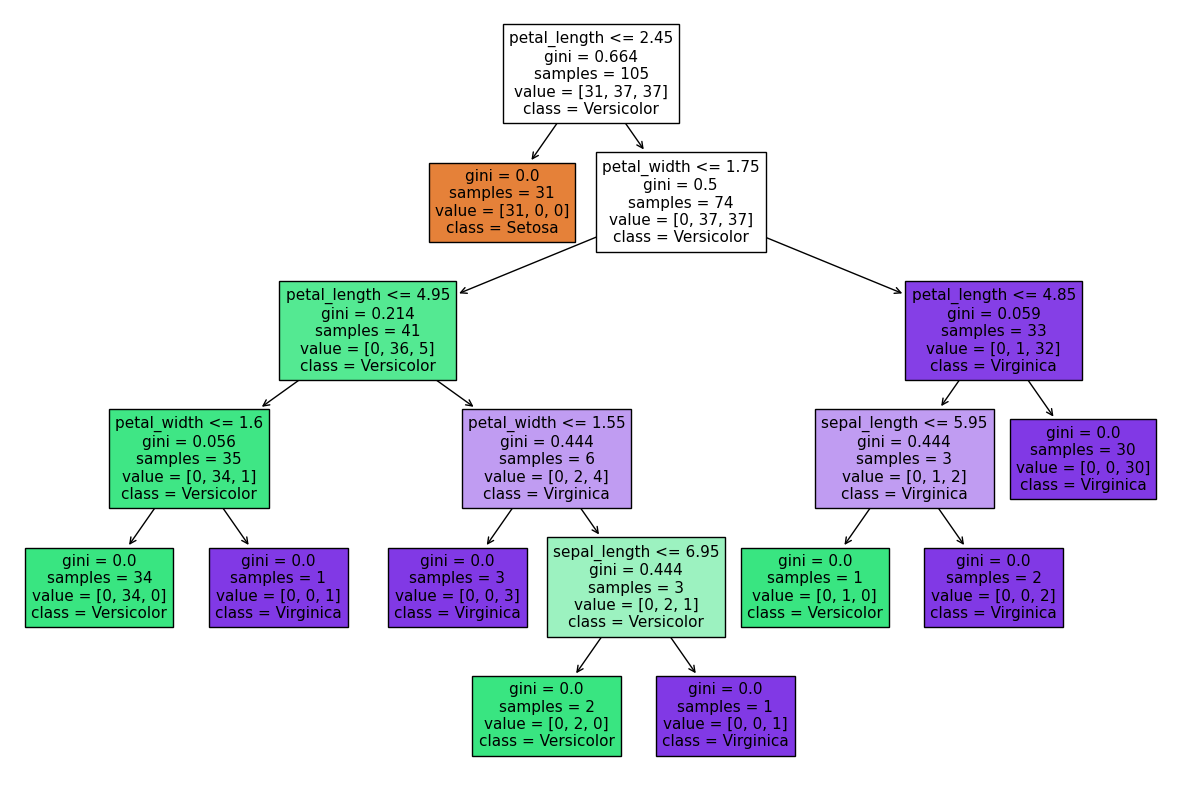

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

# 3.1
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# 3.2
y_pred = clf.predict(X_test)
print('A modell pontossága:', accuracy_score(y_test, y_pred))

# 3.3
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf, 
                   feature_names=['sepal_length', 'petal_length', 'petal_width'],  
                   class_names=['Setosa', 'Versicolor', 'Virginica'],
                   filled=True)
